In [ ]:
from sklearn.datasets import make_blobs
# make 4-class dataset for classification
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
x_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

In [ ]:
x_train.shape,y_train.shape

((100, 2), (100,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(1234)

model = Sequential(
    [Dense(2,activation='relu',name="L1"),
     Dense(4,activation='linear',name="L2")
     ])

In [ ]:
model.compile( optimizer= tf.keras.optimizers.Adam(0.01),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

model.fit(x_train,y_train,epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 8ms/step - loss: 1.6643
Epoch 2/200
4/4 [==============================] - 0s 5ms/step - loss: 1.5601
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 1.4496
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.3695
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2828
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.2167
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1608
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1086
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0705
Epoch 10/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0391
Epoch 11/200
4/4 [==============================] - 0s 6ms/step - loss: 1.0118
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.9872
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

In [ ]:
l1=model.get_layer("L1")
l2=model.get_layer("L2")

w1,b1=l1.get_weights()
w1,b1


(array([[ 1.4304746,  1.521142 ],
        [-0.6343539,  1.673981 ]], dtype=float32),
 array([-0.6733243,  1.63078  ], dtype=float32))

In [ ]:
x1=x_train[:,-1]
x2=x_train[:,-2]
x1.shape,x2.shape

((100,), (100,))

In [ ]:
import pandas as pd
df = pd.DataFrame({'x1': x1,'x2': x2, 'output': y_train})
df

,x1,x2,output
0,-1.994574,4.333483,3
1,-2.312002,4.096217,3
2,-2.190366,4.503320,3
3,3.019127,-5.397867,0
4,-0.030975,4.215020,3
...,...,...,...
95,-3.043765,-0.997440,1
96,-1.562939,-1.668320,1
97,1.150101,0.453921,2
98,2.405291,2.774749,2


<Axes: xlabel='x1', ylabel='x2'>

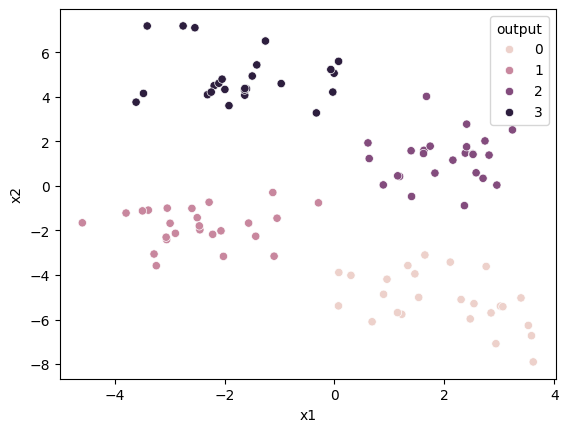

In [ ]:
import seaborn as sns
sns.scatterplot(x='x1',y='x2',hue='output',data=df)